In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)  

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron

# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

### Leemos los datos

In [3]:
# Leer FrutasTrain.csv
df_train = pd.read_csv(DATOS_DIR+"FrutasTrain.csv")
nColum = list(df_train.columns.values)
df_train.head()

,Diametro,Color,Clase
0,10,200,Naranja
1,20,30,Melon
2,8,150,Naranja
3,26,30,Melon
4,7,170,Naranja


In [4]:
# Leer FrutasTest.csv
df_test = pd.read_csv(DATOS_DIR+"FrutasTest.csv")
df_test

,Diametro,Color,Clase
0,7,100,Naranja
1,20,20,Melon
2,25,70,Melon
3,10,210,Naranja


#### Conjuntos de datos para entrenamiento y testeo

In [5]:
# Consideramos NARANJA --> 0 y MELON --> 1 (indice de la lista)
CLASES = ['Naranja', 'Melon']

#--- DATOS DE ENTRENAMIENTO ---
X_train = np.array(df_train.iloc[:,0:2])
Y_train = np.array(df_train['Clase'] == CLASES[1]).astype(int)

#--- DATOS DE TESTEO ---
X_test = np.array(df_test.iloc[:,0:2])
Y_test = np.array(df_test['Clase'] == CLASES[1]).astype(int)


#### Normalizamos los ejemplos

In [6]:
normalizar = 1

if (normalizar):
    normalizador = preprocessing.StandardScaler()
    #normalizador = preprocessing.MinMaxScaler()
    X_train = normalizador.fit_transform(X_train)
    X_test = normalizador.transform(X_test)   
    
X_train[:5,:]

array([[-1.50462909,  0.78461053],
       [ 0.23986841, -1.40200899],
       [-1.85352859,  0.14148715],
       [ 1.2865669 , -1.40200899],
       [-2.02797834,  0.3987365 ]])

#### El orden de ingreso de los ejemplos también incide en el entrenamiento

In [7]:
# orden = np.argsort(Y_train)    # ascendente
# orden = np.argsort(-Y_train)   # descendente
orden = np.random.permutation(len(Y_train))  # aleatorio

X_train = X_train[orden, :]
Y_train = Y_train[orden]
Y_train

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

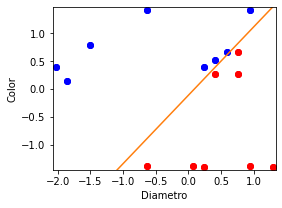

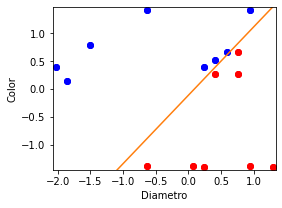

In [8]:
plt.clf()
ppn = Perceptron(alpha=0.05, n_iter=350, draw=1, title=nColum[0:2], random_state=None)
ppn.fit(X_train, Y_train)

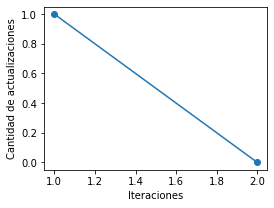

In [9]:
plt.clf()
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

#### Respuestas del perceptrón para los datos de entrenamiento

In [10]:
Y_train_pred = ppn.predict(X_train)
aciertos = sum(Y_train_pred == Y_train)
print("aciertos = ", aciertos)
nAciertos = sum(Y_train_pred == Y_train)
print("%% de aciertos = %.2f %%" % (100*nAciertos/len(Y_train)))


aciertos =  16
% de aciertos = 100.00 %


In [11]:
from sklearn import  metrics

aciertos = metrics.accuracy_score(Y_train,Y_train_pred)
print("%% accuracy = %.3f" % aciertos)

% accuracy = 1.000


In [12]:
MM = metrics.confusion_matrix(Y_train,Y_train_pred)
print("Matriz de confusión:\n%s" % MM)

Matriz de confusión:
[[8 0]
 [0 8]]


In [13]:
report = metrics.classification_report(Y_train,Y_train_pred)
print("Resultado de la clasificación:\n%s" % report)

Resultado de la clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



#### Curva ROC

AUC-ROC: 1.0


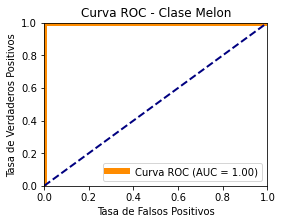

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#-- si se quiere analizar la CLASE 1 --
Y_true = Y_test   # Valores verdaderos de las clases siendo 1 la clase positiva
Y_prob = ppn.prob_positive_class(X_test) # Probabilidades de predicción para la clase 1

#-- si se quiere analizar la CLASE 0 --
#Y_true = (T+1) % 2   # Valores verdaderos de las clases siendo 1 la clase positiva
#Y_prob = 1-ppn.prob_positive_class(X) # Probabilidades de predicción para la clase 1

# Calcular AUC-ROC
auc = roc_auc_score(Y_true, Y_prob)
print(f"AUC-ROC: {auc}")

# Obtener los puntos para la curva ROC
fpr, tpr, thresholds = roc_curve(Y_true, Y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=6, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Clase ' + CLASES[1])
plt.legend(loc="lower right")
plt.show()
